In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# using ggplot style
plt.style.use("ggplot")
# setting width and height of plot
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

# load dataset
data = pd.read_csv("/content/01.csv", delimiter=";")
data.head(10)

Timestamp  CPU cores  CPU capacity provisioned [MHZ]  \
0  04.01.2016 00:00:00          2                               0   
1  04.01.2016 00:05:00          2                               0   
2  04.01.2016 00:10:00          2                               0   
3  04.01.2016 00:15:00          2                               0   
4  04.01.2016 00:20:00          2                               0   
5  04.01.2016 00:25:00          2                               0   
6  04.01.2016 00:30:00          2                               0   
7  04.01.2016 00:35:00          2                               0   
8  04.01.2016 00:40:00          2                               0   
9  04.01.2016 00:45:00          2                               0   

   CPU usage [MHZ] CPU usage [%]  Memory capacity provisioned [KB]  \
0              115          2,51                           4194304   
1              106          2,32                           4194304   
2              119          2,61                           4194304   
3              121          2,63                           4194304   
4              112          2,46                           4194304   
5              117          2,56                           4194304   
6              107          2,33                           4194304   
7              113          2,47                           4194304   
8              110           2,4                           4194304   
9              117          2,55                           4194304   

   Memory usage [KB] Memory usage [%]  Disk read throughput [KB/s]  \
0             122474             2,92                            0   
1             119538             2,85                            0   
2             329253             7,85                            0   
3             284793             6,79                            0   
4             348966             8,32                            0   
5             326736             7,79                            0   
6             270533             6,45                            0   
7             340577             8,12                            0   
8             281857             6,72                            0   
9             192519             4,59                            0   

   Disk write throughput [KB/s]  Disk size [GB]  \
0                            13              54   
1                            13              54   
2                            70              54   
3                            13              54   
4                            10              54   
5                            14              54   
6                            13              54   
7                            13              54   
8                            12              54   
9                            14              54   

   Network received throughput [KB/s]  Network transmitted throughput [KB/s]  
0                                   1                                      1  
1                                   1                                      1  
2                                   2                                     35  
3                                  11                                     35  
4                                   1                                      1  
5                                  11                                     37  
6                                   1                                      1  
7                                  11                                     36  
8                                   1                                      1  
9                                  11                                     36

In [ ]:
# # change the year from 2016 to 2020
data['Timestamp'] = data['Timestamp'].str.replace('2016','2020')
data.set_index('Timestamp', inplace=True)
data

CPU cores  CPU capacity provisioned [MHZ]  \
Timestamp                                                        
04.01.2020 00:00:00          2                               0   
04.01.2020 00:05:00          2                               0   
04.01.2020 00:10:00          2                               0   
04.01.2020 00:15:00          2                               0   
04.01.2020 00:20:00          2                               0   
...                        ...                             ...   
08.02.2020 23:35:00          2                               0   
08.02.2020 23:40:00          2                               0   
08.02.2020 23:45:00          2                               0   
08.02.2020 23:50:00          2                               0   
08.02.2020 23:55:00          2                               0   

                     CPU usage [MHZ] CPU usage [%]  \
Timestamp                                            
04.01.2020 00:00:00              115          2,51   
04.01.2020 00:05:00              106          2,32   
04.01.2020 00:10:00              119          2,61   
04.01.2020 00:15:00              121          2,63   
04.01.2020 00:20:00              112          2,46   
...                              ...           ...   
08.02.2020 23:35:00              120          2,62   
08.02.2020 23:40:00              114          2,49   
08.02.2020 23:45:00              116          2,53   
08.02.2020 23:50:00              116          2,54   
08.02.2020 23:55:00              122          2,66   

                     Memory capacity provisioned [KB]  Memory usage [KB]  \
Timestamp                                                                  
04.01.2020 00:00:00                           4194304             122474   
04.01.2020 00:05:00                           4194304             119538   
04.01.2020 00:10:00                           4194304             329253   
04.01.2020 00:15:00                           4194304             284793   
04.01.2020 00:20:00                           4194304             348966   
...                                               ...                ...   
08.02.2020 23:35:00                           4194304             471859   
08.02.2020 23:40:00                           4194304             343513   
08.02.2020 23:45:00                           4194304              83467   
08.02.2020 23:50:00                           4194304              83467   
08.02.2020 23:55:00                           4194304             127926   

                    Memory usage [%]  Disk read throughput [KB/s]  \
Timestamp                                                           
04.01.2020 00:00:00             2,92                            0   
04.01.2020 00:05:00             2,85                            0   
04.01.2020 00:10:00             7,85                            0   
04.01.2020 00:15:00             6,79                            0   
04.01.2020 00:20:00             8,32                            0   
...                              ...                          ...   
08.02.2020 23:35:00            11,25                            0   
08.02.2020 23:40:00             8,19                            0   
08.02.2020 23:45:00             1,99                            0   
08.02.2020 23:50:00             1,99                            0   
08.02.2020 23:55:00             3,05                            0   

                     Disk write throughput [KB/s]  Disk size [GB]  \
Timestamp                                                           
04.01.2020 00:00:00                            13              54   
04.01.2020 00:05:00                            13              54   
04.01.2020 00:10:00                            70              54   
04.01.2020 00:15:00                            13              54   
04.01.2020 00:20:00                            10              54   
...                                           ...             ...   
08.02.2020 23:35:00 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10368 entries, 04.01.2020 00:00:00 to 08.02.2020 23:55:00
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   CPU cores                              10368 non-null  int64 
 1   CPU capacity provisioned [MHZ]         10368 non-null  int64 
 2   CPU usage [MHZ]                        10368 non-null  int64 
 3   CPU usage [%]                          10368 non-null  object
 4   Memory capacity provisioned [KB]       10368 non-null  int64 
 5   Memory usage [KB]                      10368 non-null  int64 
 6   Memory usage [%]                       10368 non-null  object
 7   Disk read throughput [KB/s]            10368 non-null  int64 
 8   Disk write throughput [KB/s]           10368 non-null  int64 
 9   Disk size [GB]                         10368 non-null  int64 
 10  Network received throughput [KB/s]     10368 non-null  

In [ ]:
# clean the cpu usage % columns, replace , with . for decimal
data['CPU usage [%]'] = data['CPU usage [%]'].str.replace(',','.')
data['Memory usage [%]'] = data['Memory usage [%]'].str.replace(',','.')

# convert to float
data['CPU usage [%]'] = pd.to_numeric(data['CPU usage [%]'], downcast="float")
data['Memory usage [%]'] = pd.to_numeric(data['Memory usage [%]'], downcast="float")
data

CPU cores  CPU capacity provisioned [MHZ]  \
Timestamp                                                        
04.01.2020 00:00:00          2                               0   
04.01.2020 00:05:00          2                               0   
04.01.2020 00:10:00          2                               0   
04.01.2020 00:15:00          2                               0   
04.01.2020 00:20:00          2                               0   
...                        ...                             ...   
08.02.2020 23:35:00          2                               0   
08.02.2020 23:40:00          2                               0   
08.02.2020 23:45:00          2                               0   
08.02.2020 23:50:00          2                               0   
08.02.2020 23:55:00          2                               0   

                     CPU usage [MHZ]  CPU usage [%]  \
Timestamp                                             
04.01.2020 00:00:00              115           2.51   
04.01.2020 00:05:00              106           2.32   
04.01.2020 00:10:00              119           2.61   
04.01.2020 00:15:00              121           2.63   
04.01.2020 00:20:00              112           2.46   
...                              ...            ...   
08.02.2020 23:35:00              120           2.62   
08.02.2020 23:40:00              114           2.49   
08.02.2020 23:45:00              116           2.53   
08.02.2020 23:50:00              116           2.54   
08.02.2020 23:55:00              122           2.66   

                     Memory capacity provisioned [KB]  Memory usage [KB]  \
Timestamp                                                                  
04.01.2020 00:00:00                           4194304             122474   
04.01.2020 00:05:00                           4194304             119538   
04.01.2020 00:10:00                           4194304             329253   
04.01.2020 00:15:00                           4194304             284793   
04.01.2020 00:20:00                           4194304             348966   
...                                               ...                ...   
08.02.2020 23:35:00                           4194304             471859   
08.02.2020 23:40:00                           4194304             343513   
08.02.2020 23:45:00                           4194304              83467   
08.02.2020 23:50:00                           4194304              83467   
08.02.2020 23:55:00                           4194304             127926   

                     Memory usage [%]  Disk read throughput [KB/s]  \
Timestamp                                                            
04.01.2020 00:00:00              2.92                            0   
04.01.2020 00:05:00              2.85                            0   
04.01.2020 00:10:00              7.85                            0   
04.01.2020 00:15:00              6.79                            0   
04.01.2020 00:20:00              8.32                            0   
...                               ...                          ...   
08.02.2020 23:35:00             11.25                            0   
08.02.2020 23:40:00              8.19                            0   
08.02.2020 23:45:00              1.99                            0   
08.02.2020 23:50:00              1.99                            0   
08.02.2020 23:55:00              3.05                            0   

                     Disk write throughput [KB/s]  Disk size [GB]  \
Timestamp                                                           
04.01.2020 00:00:00                            13              54   
04.01.2020 00:05:00                            13              54   
04.01.2020 00:10:00                            70              54   
04.01.2020 00:15:00                            13              54   
04.01.2020 00:20:00                            10              54   
...                                           ...             .

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10368 entries, 04.01.2020 00:00:00 to 08.02.2020 23:55:00
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CPU cores                              10368 non-null  int64  
 1   CPU capacity provisioned [MHZ]         10368 non-null  int64  
 2   CPU usage [MHZ]                        10368 non-null  int64  
 3   CPU usage [%]                          10368 non-null  float32
 4   Memory capacity provisioned [KB]       10368 non-null  int64  
 5   Memory usage [KB]                      10368 non-null  int64  
 6   Memory usage [%]                       10368 non-null  float32
 7   Disk read throughput [KB/s]            10368 non-null  int64  
 8   Disk write throughput [KB/s]           10368 non-null  int64  
 9   Disk size [GB]                         10368 non-null  int64  
 10  Network received throughput [KB/s]     1036

In [ ]:
# Check if Null values exist in data
data.isnull().sum()

CPU cores                                0
CPU capacity provisioned [MHZ]           0
CPU usage [MHZ]                          0
CPU usage [%]                            0
Memory capacity provisioned [KB]         0
Memory usage [KB]                        0
Memory usage [%]                         0
Disk read throughput [KB/s]              0
Disk write throughput [KB/s]             0
Disk size [GB]                           0
Network received throughput [KB/s]       0
Network transmitted throughput [KB/s]    0
dtype: int64

In [ ]:
# dataset stats
data.describe()

CPU cores  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
count    10368.0                         10368.0     10368.000000   
mean         2.0                             0.0      1866.866995   
std          0.0                             0.0      1510.143173   
min          2.0                             0.0        95.000000   
25%          2.0                             0.0       122.000000   
50%          2.0                             0.0      2524.000000   
75%          2.0                             0.0      2542.000000   
max          2.0                             0.0      5065.000000   

       CPU usage [%]  Memory capacity provisioned [KB]  Memory usage [KB]  \
count   10368.000000                           10368.0       1.036800e+04   
mean       39.788803                         4194304.0       4.916753e+05   
std        31.148638                               0.0       2.568224e+05   
min         2.080000                         4194304.0       4.697600e+04   
25%         2.660000                         4194304.0       3.124760e+05   
50%        54.939999                         4194304.0       4.634710e+05   
75%        55.349998                         4194304.0       6.228540e+05   
max       100.000000                         4194304.0       2.189007e+06   

       Memory usage [%]  Disk read throughput [KB/s]  \
count      10368.000000                 10368.000000   
mean          11.722609                     7.087481   
std            6.123126                   247.226665   
min            1.120000                     0.000000   
25%            7.450000                     0.000000   
50%           11.050000                     0.000000   
75%           14.850000                     0.000000   
max           52.189999                 14389.000000   

       Disk write throughput [KB/s]  Disk size [GB]  \
count                  10368.000000         10368.0   
mean                      13.846933            54.0   
std                       17.640664             0.0   
min                        7.000000            54.0   
25%                       12.000000            54.0   
50%                       13.000000            54.0   
75%                       14.000000            54.0   
max                     1504.000000            54.0   

       Network received throughput [KB/s]  \
count                        10368.000000   
mean                            10.768422   
std                             41.255477   
min                              0.000000   
25%                              1.000000   
50%                              1.000000   
75%                             11.000000   
max                           1395.000000   

       Network transmitted throughput [KB/s]  
count                           10368.000000  
mean                               18.819348  
std                               140.301054  
min                                 0.000000  
25%                                 1.000000  
50%                                 1.000000  
75%                                35.000000  
max                              6761.000000

In [ ]:
# remove some columns
data = data[data.columns.difference(['CPU cores', 'CPU capacity provisioned [MHZ]', 'Memory capacity provisioned [KB]', 'Disk size [GB]'])]
data

CPU usage [%]  CPU usage [MHZ]  \
Timestamp                                             
04.01.2020 00:00:00           2.51              115   
04.01.2020 00:05:00           2.32              106   
04.01.2020 00:10:00           2.61              119   
04.01.2020 00:15:00           2.63              121   
04.01.2020 00:20:00           2.46              112   
...                            ...              ...   
08.02.2020 23:35:00           2.62              120   
08.02.2020 23:40:00           2.49              114   
08.02.2020 23:45:00           2.53              116   
08.02.2020 23:50:00           2.54              116   
08.02.2020 23:55:00           2.66              122   

                     Disk read throughput [KB/s]  \
Timestamp                                          
04.01.2020 00:00:00                            0   
04.01.2020 00:05:00                            0   
04.01.2020 00:10:00                            0   
04.01.2020 00:15:00                            0   
04.01.2020 00:20:00                            0   
...                                          ...   
08.02.2020 23:35:00                            0   
08.02.2020 23:40:00                            0   
08.02.2020 23:45:00                            0   
08.02.2020 23:50:00                            0   
08.02.2020 23:55:00                            0   

                     Disk write throughput [KB/s]  Memory usage [%]  \
Timestamp                                                             
04.01.2020 00:00:00                            13              2.92   
04.01.2020 00:05:00                            13              2.85   
04.01.2020 00:10:00                            70              7.85   
04.01.2020 00:15:00                            13              6.79   
04.01.2020 00:20:00                            10              8.32   
...                                           ...               ...   
08.02.2020 23:35:00                            14             11.25   
08.02.2020 23:40:00                            12              8.19   
08.02.2020 23:45:00                            15              1.99   
08.02.2020 23:50:00                            12              1.99   
08.02.2020 23:55:00                            16              3.05   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   
08.02.2020 23:55:00             127926                                  11   

                     Network transmitted throughput [KB/s]  
Timestamp                                                   
04.01.2020 00:00:00                                      1  
04.01.2020 00:05:00                                      1  
04.01.2020 00:10:00                                     35  
04.01.2020 00:15:00                                     35  
04.01.2020 00:20:00                                      1  
...                                                    ...  
08.02.2020 23:35:00                                     35  
08.02.2020 23:40:00                                      0  
08.02.2020 23:45:00                                      1  
08.02.2020 23:50:0

In [ ]:
 # create target variable 
 def memory_usage_label(df):
  '''Function to add target variable of the next memory usage to the previous
  time step'''
  n = 1
  df['Target'] = df[['Memory usage [KB]']].shift(-n)
  return df

new_data = memory_usage_label(data)

# remove last nan column
new_data = new_data[:-1]
new_data

CPU usage [%]  CPU usage [MHZ]  \
Timestamp                                             
04.01.2020 00:00:00           2.51              115   
04.01.2020 00:05:00           2.32              106   
04.01.2020 00:10:00           2.61              119   
04.01.2020 00:15:00           2.63              121   
04.01.2020 00:20:00           2.46              112   
...                            ...              ...   
08.02.2020 23:30:00           2.73              125   
08.02.2020 23:35:00           2.62              120   
08.02.2020 23:40:00           2.49              114   
08.02.2020 23:45:00           2.53              116   
08.02.2020 23:50:00           2.54              116   

                     Disk read throughput [KB/s]  \
Timestamp                                          
04.01.2020 00:00:00                            0   
04.01.2020 00:05:00                            0   
04.01.2020 00:10:00                            0   
04.01.2020 00:15:00                            0   
04.01.2020 00:20:00                            0   
...                                          ...   
08.02.2020 23:30:00                            0   
08.02.2020 23:35:00                            0   
08.02.2020 23:40:00                            0   
08.02.2020 23:45:00                            0   
08.02.2020 23:50:00                            0   

                     Disk write throughput [KB/s]  Memory usage [%]  \
Timestamp                                                             
04.01.2020 00:00:00                            13              2.92   
04.01.2020 00:05:00                            13              2.85   
04.01.2020 00:10:00                            70              7.85   
04.01.2020 00:15:00                            13              6.79   
04.01.2020 00:20:00                            10              8.32   
...                                           ...               ...   
08.02.2020 23:30:00                            14              6.59   
08.02.2020 23:35:00                            14             11.25   
08.02.2020 23:40:00                            12              8.19   
08.02.2020 23:45:00                            15              1.99   
08.02.2020 23:50:00                            12              1.99   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:30:00             276405                                   1   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   

                     Network transmitted throughput [KB/s]    Target  
Timestamp                                                             
04.01.2020 00:00:00                                      1  119538.0  
04.01.2020 00:05:00                                      1  329253.0  
04.01.2020 00:10:00                                     35  284793.0  
04.01.2020 00:15:00                                     35  348966.0  
04.01.2020 00:20:00                                      1  326736.0  
...                                                    ...       ...  
08.02.2020 23:30:00                                      1  471859.0  
08.02.2020 23:35:00                               

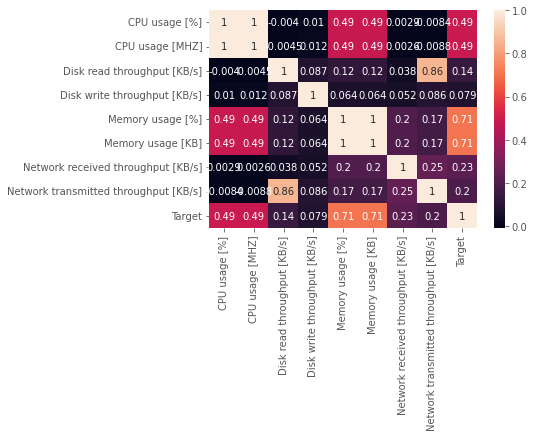

In [ ]:
sns.heatmap(new_data.corr(), annot=True)

Remove the Memory Usage [%] and CPU Usage [%] columns. Disk read throughput has a high correlation with Network transmitted throughput. We remove the disk read throughput variable and use the newtwork transmitted throughput variable.

In [ ]:
# Remove some features
new_data = new_data[new_data.columns.difference(['Memory usage [%]', 'CPU usage [%]', 'Disk read throughput [KB/s]'])]
new_data

CPU usage [MHZ]  Disk write throughput [KB/s]  \
Timestamp                                                            
04.01.2020 00:00:00              115                            13   
04.01.2020 00:05:00              106                            13   
04.01.2020 00:10:00              119                            70   
04.01.2020 00:15:00              121                            13   
04.01.2020 00:20:00              112                            10   
...                              ...                           ...   
08.02.2020 23:30:00              125                            14   
08.02.2020 23:35:00              120                            14   
08.02.2020 23:40:00              114                            12   
08.02.2020 23:45:00              116                            15   
08.02.2020 23:50:00              116                            12   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:30:00             276405                                   1   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   

                     Network transmitted throughput [KB/s]    Target  
Timestamp                                                             
04.01.2020 00:00:00                                      1  119538.0  
04.01.2020 00:05:00                                      1  329253.0  
04.01.2020 00:10:00                                     35  284793.0  
04.01.2020 00:15:00                                     35  348966.0  
04.01.2020 00:20:00                                      1  326736.0  
...                                                    ...       ...  
08.02.2020 23:30:00                                      1  471859.0  
08.02.2020 23:35:00                                     35  343513.0  
08.02.2020 23:40:00                                      0   83467.0  
08.02.2020 23:45:00                                      1   83467.0  
08.02.2020 23:50:00                                      1  127926.0  

[10367 rows x 6 columns]

Create a function to normalize the data

In [ ]:
# # Function to normalize data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# def normalize(df):
#   # transform all columns
#   x = scaler.fit_transform(df)
#   # convert the numpy array back to a dataframe and join the timestamp column to it
#   x = pd.DataFrame(x, columns=new_data.columns)
#   # add the timestamp column as index in the normalized columns
#   x.set_index(new_data.index, inplace=True)
#   return x

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_memory_plot(df, title):
  fig = px.line(title=title)
  for i in df[['Memory usage [KB]']]:
    fig.add_scatter(x=df.index, y=df[i], name=i)
  fig.show()

In [ ]:
# plot interactive chart for VM  memory data
interactive_memory_plot(new_data, 'Memory Usage Plot')

In [ ]:
# # plot interactive chart for VM data
# interactive_memory_plot(normalize(new_data), 'Normalized Memory Usage Plot')

### Do Exploratory Data Analysis

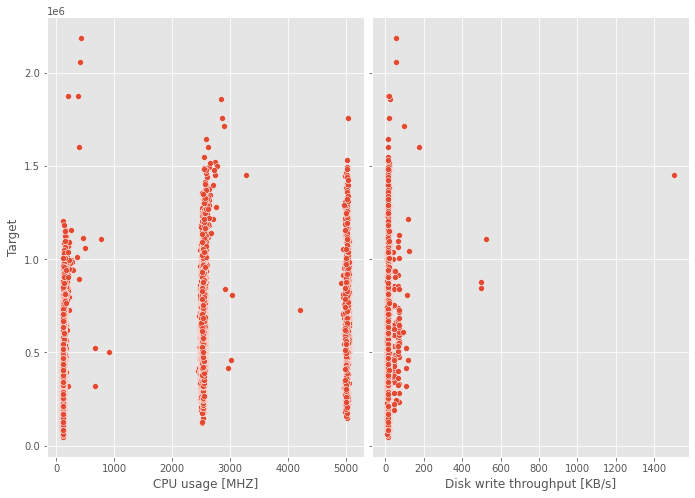

In [ ]:
sns.pairplot(new_data, x_vars=['CPU usage [MHZ]', 'Disk write throughput [KB/s]'],
             y_vars='Target', height=7, aspect=0.7)

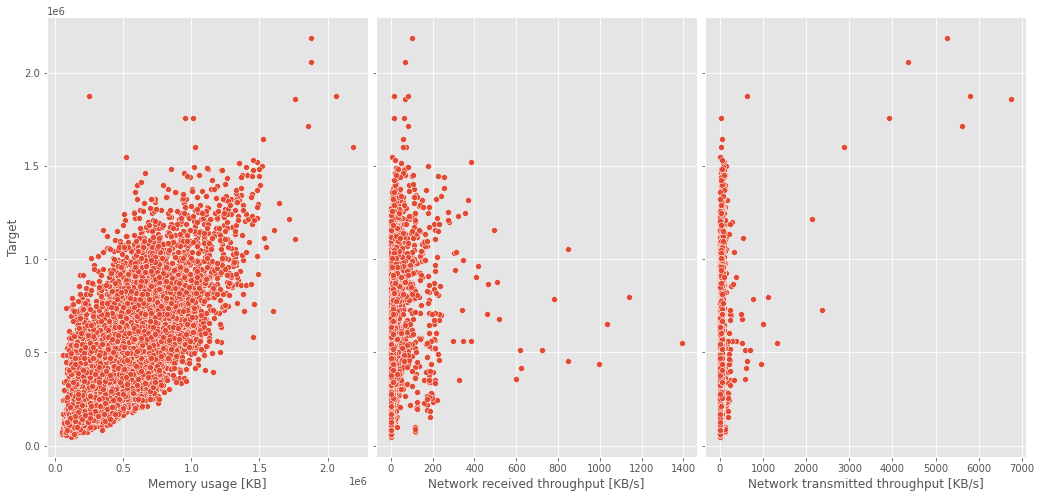

In [ ]:
sns.pairplot(new_data, x_vars=['Memory usage [KB]', 'Network received throughput [KB/s]',
                               'Network transmitted throughput [KB/s]'],
             y_vars='Target', height=7, aspect=0.7)

In [ ]:
# # Remove some features
# new_data = new_data[new_data.columns.difference(['Disk read throughput [KB/s]', 'Disk write throughput [KB/s]'])]
# new_data

In [ ]:
# let's not normalize the data
scaled_data = new_data
scaled_data

CPU usage [MHZ]  Disk write throughput [KB/s]  \
Timestamp                                                            
04.01.2020 00:00:00              115                            13   
04.01.2020 00:05:00              106                            13   
04.01.2020 00:10:00              119                            70   
04.01.2020 00:15:00              121                            13   
04.01.2020 00:20:00              112                            10   
...                              ...                           ...   
08.02.2020 23:30:00              125                            14   
08.02.2020 23:35:00              120                            14   
08.02.2020 23:40:00              114                            12   
08.02.2020 23:45:00              116                            15   
08.02.2020 23:50:00              116                            12   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:30:00             276405                                   1   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   

                     Network transmitted throughput [KB/s]    Target  
Timestamp                                                             
04.01.2020 00:00:00                                      1  119538.0  
04.01.2020 00:05:00                                      1  329253.0  
04.01.2020 00:10:00                                     35  284793.0  
04.01.2020 00:15:00                                     35  348966.0  
04.01.2020 00:20:00                                      1  326736.0  
...                                                    ...       ...  
08.02.2020 23:30:00                                      1  471859.0  
08.02.2020 23:35:00                                     35  343513.0  
08.02.2020 23:40:00                                      0   83467.0  
08.02.2020 23:45:00                                      1   83467.0  
08.02.2020 23:50:00                                      1  127926.0  

[10367 rows x 6 columns]

In [ ]:
scaled_data.shape

(10367, 6)

In [ ]:
# Create Feature and Target
X = scaled_data.iloc[:, :-1].values
y = scaled_data.iloc[:, -1].values
print(X)
print(y, end='\n\n')

print('The shape of the features is {}'.format(X.shape))
print('The shape of the target variable is {}'.format(y.shape))

[[   115     13 122474      1      1]
 [   106     13 119538      1      1]
 [   119     70 329253      2     35]
 ...
 [   114     12 343513      0      0]
 [   116     15  83467      1      1]
 [   116     12  83467      0      1]]
[119538. 329253. 284793. ...  83467.  83467. 127926.]

The shape of the features is (10367, 5)
The shape of the target variable is (10367,)


In [ ]:
# split data into training and test set
# using train_test_split will shuffle the data,
# except you set the shuffle parameter to False
split = int(0.75 * len(X))
split

X_train = X[:split]
print('The shape of X_train is {}'.format(X_train.shape))

y_train = y[:split]
print('The shape of y_train is {}'.format(y_train.shape))

X_test = X[split:]
print('The shape of X_test is {}'.format(X_test.shape))

y_test = y[split:]
print('The shape of y_test is {}'.format(y_test.shape))

The shape of X_train is (7775, 5)
The shape of y_train is (7775,)
The shape of X_test is (2592, 5)
The shape of y_test is (2592,)


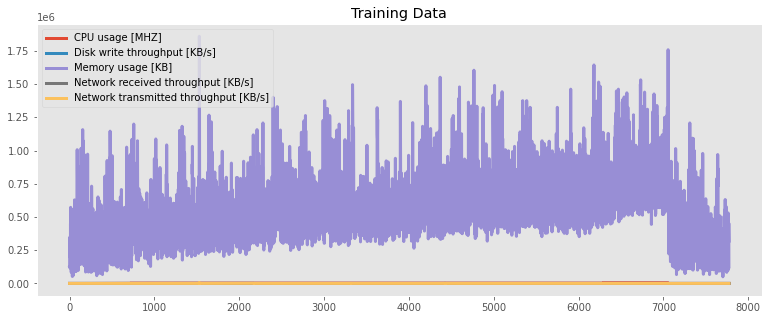

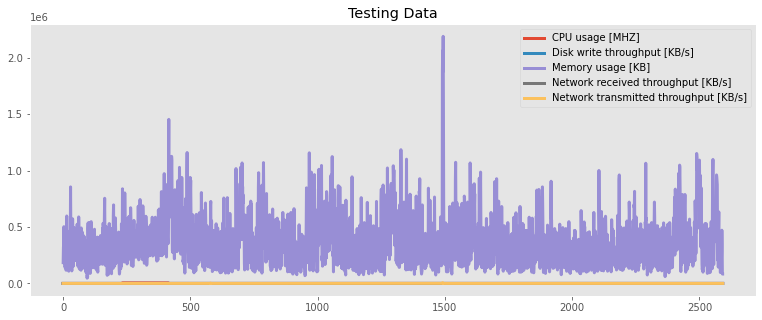

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize=(13, 5))
  plt.plot(data, linewidth=3)
  plt.title(title)
  plt.legend(new_data.columns)
  plt.grid()

show_plot(X_train, "Training Data")
show_plot(X_test, "Testing Data")

In [ ]:
# Function to plot model's prediction against actual value
def plot_pred(df, title):
  fig = px.line(title=title)
  for i in df.columns:
    fig.add_scatter(x=df.index, y=df[i], name=i)
  fig.show()

# Ridge Regression

R Squared on Training Set:  0.5484150005409378
RMSE of Ridge Regressor [Training set]:  0.5258669737891906
R Squared on Test Set:  0.27761944012382234
RMSE of Ridge Regressor [Test set]:  0.7410600525166822


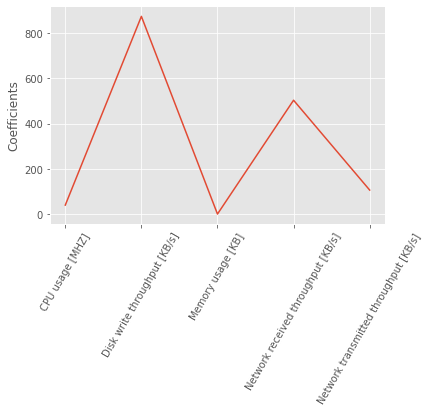

[4.01116011e+01 8.74036983e+02 5.83997422e-01 5.03510469e+02
 1.06559563e+02]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error as MSE

features = new_data.columns.difference(['Target'])

# fit model to training data
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_1 = ridge_model.predict(X_test)
print("R Squared on Training Set: ", ridge_model.score(X_train, y_train))
print("RMSE of Ridge Regressor [Training set]: ", np.sqrt(MSE(y_train, ridge_model.predict(X_train))))
print("R Squared on Test Set: ", ridge_model.score(X_test, y_test))
print("RMSE of Ridge Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_1)))

# plot the coefficients as a function of the feature names
_ = plt.plot(range(len(features)), ridge_model.coef_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
print(ridge_model.coef_)

In [ ]:
# Make Prediction
predicted_memory_usage = ridge_model.predict(X)

# function to add predicted value and actual value in a dataframe
def actual_vs_predicted(dataset, actual, prediction):
  '''dataset: dataframe, extract the timestamp from the dataset
     actual: list, target value
     prediction: list, model's predictions'''
  # Create a dataframe based on the timestamp, showing actual cpu usage and predicted cpu usage
  df_predicted = pd.DataFrame()
  # Add the actual values to the dataframe
  df_predicted["Actual"] = actual
  # Add the predicted values to the dataframe
  df_predicted["Prediction"] = prediction
  df_predicted.set_index(dataset.index, inplace=True)
  return df_predicted

df_predicted = actual_vs_predicted(new_data, y, predicted_memory_usage)
display(df_predicted)

filename = 'ridge_memory.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (Ridge)")

Actual     Prediction
Timestamp                                   
04.01.2020 00:00:00  119538.0  199733.254712
04.01.2020 00:05:00  329253.0  197657.633872
04.01.2020 00:10:00  284793.0  374598.747656
04.01.2020 00:15:00  348966.0  303425.931667
04.01.2020 00:20:00  326736.0  329261.553012
...                       ...            ...
08.02.2020 23:30:00  471859.0  290903.714837
08.02.2020 23:35:00  343513.0  413505.918750
08.02.2020 23:40:00   83467.0  327295.242207
08.02.2020 23:45:00   83467.0  178741.452849
08.02.2020 23:50:00  127926.0  175615.831430

[10367 rows x 2 columns]

Dataframe has been saved to excel file


# Lasso Regression

R Squared on Training Set:  0.5484150005409387
RMSE of Lasso Regressor [Training set]:  0.525866973550695
R Squared on Test Set:  0.2776194213818872
RMSE of Lasso Regressor [Test set]:  0.7410600515970031


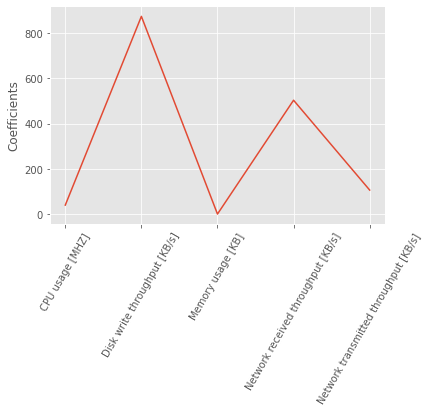

[4.01116016e+01 8.74037851e+02 5.83997418e-01 5.03510489e+02
 1.06559554e+02]


In [ ]:
from sklearn.linear_model import Lasso

# fit model to training data
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_2 = lasso_model.predict(X_test)
print("R Squared on Training Set: ", lasso_model.score(X_train, y_train))
print("RMSE of Lasso Regressor [Training set]: ", np.sqrt(MSE(y_train, lasso_model.predict(X_train))))
print("R Squared on Test Set: ", lasso_model.score(X_test, y_test))
print("RMSE of Lasso Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_2)))

# plot the coefficients as a function of the feature names
_ = plt.plot(range(len(features)), lasso_model.coef_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
print(lasso_model.coef_)

In [ ]:
# Make Prediction
predicted_memory_usage = lasso_model.predict(X)

df_predicted = actual_vs_predicted(new_data, y, predicted_memory_usage)
display(df_predicted)

filename = 'lasso_memory.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (Lasso)")

Actual     Prediction
Timestamp                                   
04.01.2020 00:00:00  119538.0  199733.254533
04.01.2020 00:05:00  329253.0  197657.633699
04.01.2020 00:10:00  284793.0  374598.795863
04.01.2020 00:15:00  348966.0  303425.930750
04.01.2020 00:20:00  326736.0  329261.549353
...                       ...            ...
08.02.2020 23:30:00  471859.0  290903.714938
08.02.2020 23:35:00  343513.0  413505.917980
08.02.2020 23:40:00   83467.0  327295.240295
08.02.2020 23:45:00   83467.0  178741.454557
08.02.2020 23:50:00  127926.0  175615.830514

[10367 rows x 2 columns]

Dataframe has been saved to excel file


# RandomForest Regressor

R Squared on Training Set:  0.9419977470073515
RMSE of RandomForest Regressor [Training set]:  0.3130759933278224
R Squared on Test Set:  0.3632403372148456
RMSE of RandomForest Regressor [Test set]:  0.7489725220823304


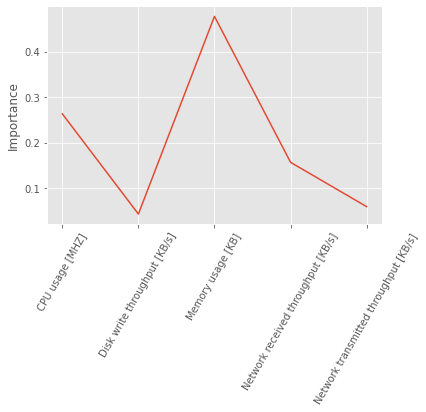

[0.26331057 0.04320977 0.47725949 0.1567855  0.05943467]


In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=50,
                           random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Evaluate of Validation Data
y_pred_3 = rf.predict(X_test)
print("R Squared on Training Set: ", rf.score(X_train, y_train))
print("RMSE of RandomForest Regressor [Training set]: ", np.sqrt(MSE(y_train, rf.predict(X_train))))
print("R Squared on Test Set: ", rf.score(X_test, y_test))
print("RMSE of RandomForest Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_3)))

# plot the feature importance of the rf model
_ = plt.plot(range(len(features)), rf.feature_importances_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Importance')
plt.show()
print(rf.feature_importances_)

In [ ]:
# Make Prediction
predicted_memory_usage = rf.predict(X)

df_predicted = actual_vs_predicted(new_data, y, predicted_memory_usage)
display(df_predicted)

filename = 'randomforest_memory.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (Random Forest Regressor)")

Actual     Prediction
Timestamp                                   
04.01.2020 00:00:00  119538.0  135699.853333
04.01.2020 00:05:00  329253.0  272034.160000
04.01.2020 00:10:00  284793.0  327801.460000
04.01.2020 00:15:00  348966.0  323003.240000
04.01.2020 00:20:00  326736.0  333002.380000
...                       ...            ...
08.02.2020 23:30:00  471859.0  329085.080000
08.02.2020 23:35:00  343513.0  308155.520000
08.02.2020 23:40:00   83467.0  374073.260000
08.02.2020 23:45:00   83467.0  199363.900000
08.02.2020 23:50:00  127926.0  181179.168333

[10367 rows x 2 columns]

Dataframe has been saved to excel file


# XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# check for the best number of n_estimators
xgboost_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, n_jobs=-1)
xgboost_model.fit(X_train, y_train,
                  early_stopping_rounds=200,
                  eval_set=[(X_test, y_test)],
                  verbose=True)

[16:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:412829
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:409280
[2]	validation_0-rmse:405786
[3]	validation_0-rmse:402330
[4]	validation_0-rmse:398916
[5]	validation_0-rmse:395433
[6]	validation_0-rmse:392115
[7]	validation_0-rmse:388715
[8]	validation_0-rmse:385521
[9]	validation_0-rmse:382302
[10]	validation_0-rmse:379087
[11]	validation_0-rmse:375947
[12]	validation_0-rmse:372901
[13]	validation_0-rmse:369897
[14]	validation_0-rmse:366866
[15]	validation_0-rmse:363938
[16]	validation_0-rmse:360936
[17]	validation_0-rmse:358067
[18]	validation_0-rmse:355139
[19]	validation_0-rmse:352263
[20]	validation_0-rmse:349501
[21]	validation_0-rmse:346728
[22]	validation_0-rmse:343958
[23]	validation_0-rmse:341414
[24]	validation_0-rmse:338693
[25]	validation_0-rmse:336039
[26]	validation_0-rmse:333596
[27]	va

XGBRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1)

[16:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Squared on Training Set:  0.6803872745344339
RMSE of XGBoost Regressor [Training set]:  0.48766718023725325
R Squared on Test Set:  0.44813704449506087
RMSE of XGBoost Regressor [Test set]:  0.6823542595563333


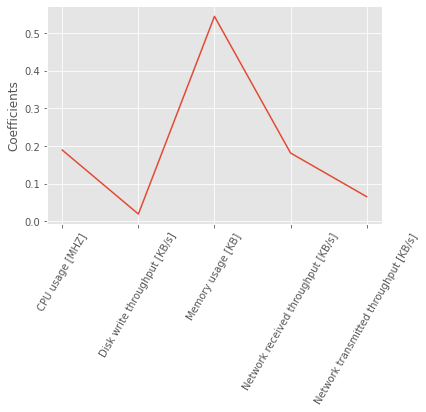

[0.18925214 0.01956793 0.5440263  0.1814635  0.06569018]


In [ ]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=493, learning_rate=0.01)
xgboost_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model.predict(X_test)
print("R Squared on Training Set: ", xgboost_model.score(X_train, y_train))
print("RMSE of XGBoost Regressor [Training set]: ", np.sqrt(MSE(y_train, xgboost_model.predict(X_train))))
print("R Squared on Test Set: ", xgboost_model.score(X_test, y_test))
print("RMSE of XGBoost Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_5)))

# plot the coefficients as a function of the feature names
_ = plt.plot(range(len(features)), xgboost_model.feature_importances_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
print(xgboost_model.feature_importances_)

In [ ]:
# Make Prediction
predicted_memory_usage = xgboost_model.predict(X)

df_predicted = actual_vs_predicted(new_data, y, predicted_memory_usage)
display(df_predicted)

filename = 'xgboost_memory.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (XGBoost Regressor)")

Actual     Prediction
Timestamp                                   
04.01.2020 00:00:00  119538.0  199598.890625
04.01.2020 00:05:00  329253.0  199598.890625
04.01.2020 00:10:00  284793.0  294095.187500
04.01.2020 00:15:00  348966.0  278653.500000
04.01.2020 00:20:00  326736.0  279329.562500
...                       ...            ...
08.02.2020 23:30:00  471859.0  314502.375000
08.02.2020 23:35:00  343513.0  347308.343750
08.02.2020 23:40:00   83467.0  256980.546875
08.02.2020 23:45:00   83467.0  246803.203125
08.02.2020 23:50:00  127926.0  200395.656250

[10367 rows x 2 columns]

Dataframe has been saved to excel file


## Using LSTMS

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
# adding extra dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((7775, 4, 1), (2592, 4, 1))

In [ ]:
# create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences=True)(inputs)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 1)]            0         
                                                                 
 lstm_9 (LSTM)               (None, 4, 150)            91200     
                                                                 
 lstm_10 (LSTM)              (None, 4, 150)            180600    
                                                                 
 lstm_11 (LSTM)              (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 452,551
Trainable params: 452,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/30
195/195 [==============================] - 12s 35ms/step - loss: 0.0097 - val_loss: 0.0132
Epoch 2/30
195/195 [==============================] - 6s 28ms/step - loss: 0.0071 - val_loss: 0.0087
Epoch 3/30
195/195 [==============================] - 5s 28ms/step - loss: 0.0066 - val_loss: 0.0139
Epoch 4/30
195/195 [==============================] - 5s 28ms/step - loss: 0.0067 - val_loss: 0.0332
Epoch 5/30
195/195 [==============================] - 6s 31ms/step - loss: 0.0064 - val_loss: 0.0158
Epoch 6/30
195/195 [==============================] - 7s 36ms/step - loss: 0.0063 - val_loss: 0.0104
Epoch 7/30
195/195 [==============================] - 10s 50ms/step - loss: 0.0063 - val_loss: 0.0163
Epoch 8/30
195/195 [==============================] - 9s 46ms/step - loss: 0.0063 - val_loss: 0.0251
Epoch 9/30
195/195 [==============================] - 6s 31ms/step - loss: 0.0062 - val_loss: 0.0235
Epoch 10/30
195/195 [==============================] - 6s 32ms/step - loss: 0.0063 - val_

In [ ]:
# Evaluate of Validation Data
from sklearn.metrics import r2_score
y_pred_2 = model.predict(X_test)
print("R Squared on Training Set: ", r2_score(y_train, model.predict(X_train)))
print("RMSE of LSTM [Training set]: ", np.sqrt(MSE(y_train, model.predict(X_train))))
print("R Squared on Test Set: ", r2_score(y_test, y_pred_2)
print("RMSE of LSTM [Test set]: ", np.sqrt(MSE(y_test, y_pred_2)))

SyntaxError: ignored

In [ ]:
# Make Prediction
predicted_memory_usage = model.predict(X)
print("Prediction on the entire dataset", predicted_memory_usage)

# Append the predicted values into a list
predicted = []
for i in predicted_memory_usage:
  predicted.append(i[0])
print("Total number of predictions made", len(predicted))

print("Total number of actual values in the dataset", len(y))
print("Actual values of memory usage", y)

# Create a dataframe based on the timestamp, showing actual ram usage and predicted ram usage
df_predicted = pd.DataFrame()
# Add the actual values to the dataframe
# df_predicted["Actual"] = new_data['Target']
df_predicted["Actual"] = y
# Add the predicted values to the dataframe
df_predicted["Prediction"] = predicted
df_predicted.set_index(new_data.index, inplace=True)
df_predicted

Prediction on the entire dataset [[0.07696301]
 [0.07636337]
 [0.12146537]
 ...
 [0.12384465]
 [0.06872896]
 [0.06847344]]
Total number of predictions made 10367
Total number of actual values in the dataset 10367
Actual values of memory usage [0.03387533 0.13178007 0.11102407 ... 0.0170357  0.0170357  0.03779124]


Actual  Prediction
Timestamp                                
04.01.2016 00:00:00  0.033875    0.076963
04.01.2016 00:05:00  0.131780    0.076363
04.01.2016 00:10:00  0.111024    0.121465
04.01.2016 00:15:00  0.140983    0.114193
04.01.2016 00:20:00  0.130605    0.125278
...                       ...         ...
08.02.2016 23:30:00  0.198355    0.109691
08.02.2016 23:35:00  0.138437    0.154552
08.02.2016 23:40:00  0.017036    0.123845
08.02.2016 23:45:00  0.017036    0.068729
08.02.2016 23:50:00  0.037791    0.068473

[10367 rows x 2 columns]

In [ ]:
# Plot the results
interactive_plot2(df_predicted, "Original vs. Predictions (LSTM)")